In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# IMPORTING AND VIEWING DATASET
dataset = pd.read_csv('./Concrete_DataNew.csv')
dataset.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# OVERVIEWING THE DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Blast               1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CA                  1030 non-null float64
FA                  1030 non-null float64
Age                 1030 non-null int64
CMS                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# SET OF NULL VALUES
dataset.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

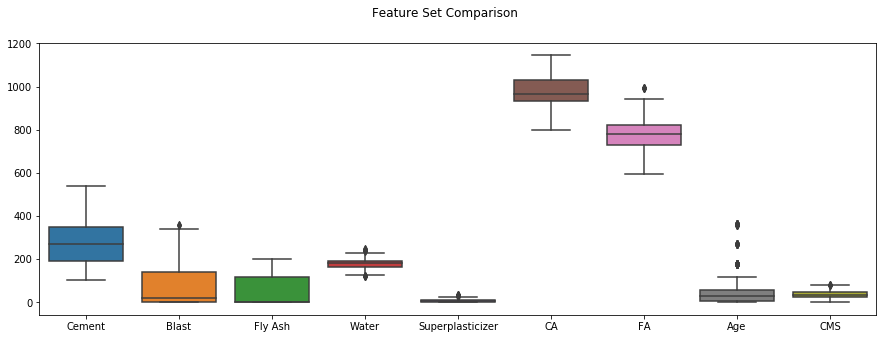

In [5]:
# COMPARING BY BOX PLOT
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

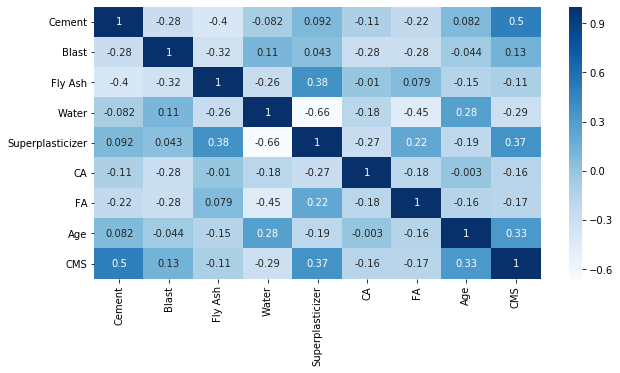

In [6]:
# VISUALS OF RELATION
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [7]:
#FIND RELATION OF INDEPENDENT VARIABLE
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


In [8]:
# X AND Y VARIABLES
x = dataset.drop('CMS', axis=1).values
Y = dataset['CMS'].values

# TRAINING DATA
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100) 

# SCALE THE DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

# MODELS
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# LEARNING CURVES
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=Y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='red', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='red')

    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='blue')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,15])
    plt.show()

k-NN LEARNING CURVE


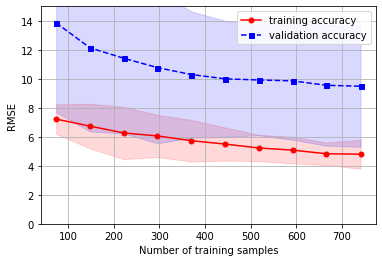

In [10]:
# PLOT CURVE
print('k-NN LEARNING CURVE')
plot_learning_curves(KNeighborsRegressor(2))

In [13]:
# GRIDSEARCH

from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

# KNN REGRESSION MODEL
knnreg2 = KNeighborsRegressor()
k_range = range(1, 10)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         n_jobs=-1,scoring='neg_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation


# STANDARD KNN MODEL
classifier_org = KNeighborsRegressor()

# KNN MODEL
classifier_org.fit(x_train2, Y_train)

# PREDICTION
y_pred_org = classifier_org.predict(x_test2)

print('Standard Model')
print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred_org)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred_org)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred_org)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred_org))))

Standard Model

R2: 0.79
Mean Absolute Error: 6.21
Mean Squared Error: 63.79
Root Mean Squared Error: 7.99


In [12]:
# CREATING HEADING
print('Optimized Model') 

# GRID SEARCH
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
     #Fit grid search
     optmodel.fit(x_train2, Y_train) 
     #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
     # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred3)))
     print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred3)))  
     print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred3)))  
     print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))))

Optimized Model

Estimator: k-NN Regression Model

Best params: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

R2: 0.81
Mean Absolute Error: 5.51
Mean Squared Error: 57.15
Root Mean Squared Error: 7.56


C:\Users\tulan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
